In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from theano import tensor as tt
import scipy.stats as st
import seaborn as sns
import scipy
import import_ipynb
import GP_util #load module first
import importlib
importlib.reload(GP_util) # reload full module
from GP_util import unique, select, distancematrix,linear_pixel
#import methods from reloaded module

In [3]:
datapath = '/home/brian/WesternWheat/Data/Processed/stripped_mini_maxseason_labeled_df_23.csv'
#datapath = '/home/brian/WesternWheat/Data/Processed/stripped_max_labeled_df_23.csv'
#datapath = '/home/brian/WesternWheat/Data/Processed/maxdf_23.csv'

df = pd.read_csv(datapath)

df = select(df) # selects subset of df for time/memory reductions

there are 164 unique farms in loaded df


In [4]:
f, df_unique, zero_farm_idx, Num_farms = unique(df)

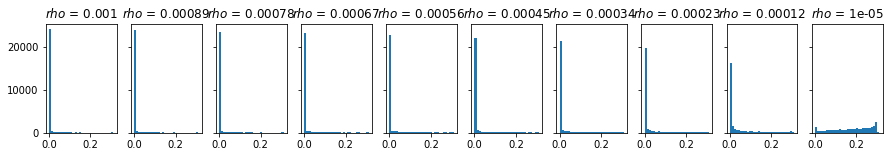

In [5]:
n=10
k = np.zeros([n])
etas = np.linspace(0,1,10)
rhos = np.logspace(-3.8,-4.9,n)
rhos = np.linspace(1e-3,1e-5,n)
sigmay = .01
etasq = .3
fig,ax = plt.subplots(1,n,figsize=(n*1.5,2),sharey=True)
for j, rhosq in enumerate(rhos):
    Kij = etasq*(np.exp(-rhosq*Dmatsq))+np.diag([sigmay]*Num_farms)
    #sns.kdeplot(data=np.ravel(Kij),ax=ax[j])
    ax[j].hist(np.ravel(Kij),bins=30)
    ax[j].set_title(r'$rho$ = {}'.format(round(rhosq,6)))
   

0.5365853658536586 2.048780487804878 2.9146341463414633 109.15853658536585


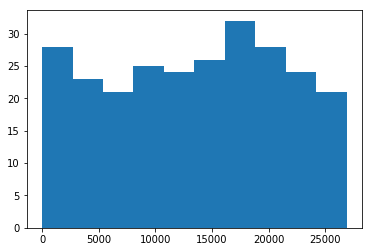

In [23]:

etasq= 1
rhosq = 1e-2
Kij = etasq*(np.exp(-rhosq*Dmatsq))+np.diag([sigmay]*Num_farms)
k = np.ravel(Kij)
b = etasq/2
p = .05
l = .01
#sns.heatmap(Kij);
#print (np.nonzero(np.ravel(Kij)).size/175)
N0 = (np.nonzero(k)[0].size-Num_farms)/Num_farms
Nb = (np.argwhere(k>b).size - Num_farms) / Num_farms
Np = (np.argwhere(k>p).size - Num_farms) / Num_farms
Nl = (np.argwhere(k>l).size - Num_farms) / Num_farms
print (Nb,Np, Nl, N0)
#plt.hist(np.ravel(Kij),bins=80);
plt.hist(np.argwhere(k>b));

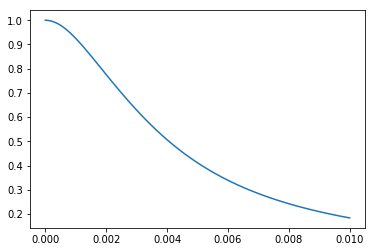

In [41]:
rho = np.linspace(1e-2,1e-6, 100)
k = []
for r in rho:
    K = etasq*(np.exp(-(r**2)*Dmatsq))+np.diag([sigmay]*Num_farms)
    k.append(np.sum(K))
plt.plot(rho,np.array(k)/Num_farms**2);

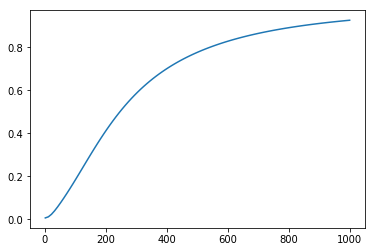

In [35]:
ls = np.linspace(1,1000,100)
k = []
for l in ls:
    K = 1*(np.exp(-(Dmatsq)/l**2))+np.diag([sigmay]*Num_farms)
    k.append(np.sum(K))
plt.plot(ls,np.array(k)/Num_farms**2);

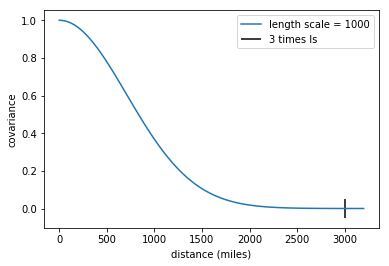

In [79]:
ls = 1000
distances = np.linspace(0,ls*3.2,100)
sigmasq =1
plt.plot(distances, sigmasq*np.exp(-(distances)**2/ls**2), label='length scale = {}'.format(ls))
plt.xlabel('distance (miles)')
plt.ylabel('covariance')
plt.vlines(x=3*ls,ymin=-.05,ymax=.05, label='3 times ls')
plt.legend();

In [72]:
1/np.sqrt(1e-4)

100.0